<a href="https://colab.research.google.com/github/askuts/baseball-analysis/blob/main/baseball_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/drgilermo/nba-players-stats - ссылка на набор данных

In [ ]:
# сделаю импорты необходимых библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# загружу набор данных
data = pd.read_csv('Players.csv')
data = data.drop(columns=['Unnamed: 0'])
data

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
...,...,...,...,...,...,...,...
3917,Troy Williams,198.0,97.0,South Carolina State University,1969.0,Columbia,South Carolina
3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992.0,Portland,Oregon
3919,Stephen Zimmerman,213.0,108.0,"University of Nevada, Las Vegas",1996.0,Hendersonville,Tennessee
3920,Paul Zipser,203.0,97.0,NaN,1994.0,Heidelberg,Germany


In [ ]:
data = data.dropna() # исключим из данных объекты с пропусками

In [ ]:
data.info() # в данных осталось 3189 объектов

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 1 to 3919
Data columns (total 7 columns):
Player         3189 non-null object
height         3189 non-null float64
weight         3189 non-null float64
collage        3189 non-null object
born           3189 non-null float64
birth_city     3189 non-null object
birth_state    3189 non-null object
dtypes: float64(3), object(4)
memory usage: 199.3+ KB


In [ ]:
cat = ['Player', 'collage', 'birth_city', 'birth_state'] # выделим
# категориальные признаки
nums = [c for c in data.columns if c not in cat] # наполним массив
# с названиями числовых признаков

In [ ]:
data[nums].describe()

,height,weight,born
count,3189.000000,3189.000000,3189.000000
mean,198.663531,94.723424,1964.063656
std,9.043461,11.804876,18.604145
min,160.000000,60.000000,1915.000000
25%,193.000000,86.000000,1952.000000
50%,198.000000,95.000000,1965.000000
75%,206.000000,102.000000,1979.000000
max,231.000000,163.000000,1997.000000


В среднем, рост баскетболиста 198см, вес почти 95 кг.  
Самый высокий из учтенных баскетболистов был ростом 231см, самый низкий 160см.  
Самый тяжелый весил 163кг, самый низкий вес баскетболиста 60кг.

In [ ]:
def get_highest(data, feature): # определим функцию, определяющую как звали/зовут
# самого высокого и самого тяжелого баскетболистов
    # кол-во очков и признак
    print(data.loc[data[feature] == data[feature].max(), 'Player'].unique()[0], # определим имя
          'was {val} in {f}'.format(val=data[feature].max(), f=feature)) # сколько единиц и какой признак

get_highest(data, 'height')
get_highest(data, 'weight')

Manute Bol was 231.0 in height
Sim Bhullar was 163.0 in weight


In [ ]:
# проделаем то же самое для самых низких по показателям

def get_worst(data, feature):
    print(data.loc[data[feature] == data[feature].min(), 'Player'].unique()[0],
          'was {val} in {f}'.format(val=data[feature].min(), f=feature))

get_worst(data, 'height')
get_worst(data, 'weight')

Muggsy Bogues was 160.0 in height
Spud Webb was 60.0 in weight


In [ ]:
data[cat].describe()

,Player,collage,birth_city,birth_state
count,3189,3189,3189,3189
unique,3189,392,1108,111
top,Joe Cooper,University of Kentucky,Chicago,California
freq,1,84,112,337


Высшим учебным заведением, открывшим свету больше всего баскетболистов, стал Университет Калифорнии.  
Городом, из которого вышло больше всего баскетболистов стал Чикаго.  
Штат, как понятно из названия университета - Калифорния.

### Графики

Можно провизуализировать числовые признаки с помощью kdeplot, а для категориальных, помимо имени, определить функцию, которая будет строить countplot для 10 самых популярных значений в признаке.

In [ ]:
data.corr() # проверим, насколько коррелируют признаки

,height,weight,born
height,1.000000,0.817434,0.182217
weight,0.817434,1.000000,0.290262
born,0.182217,0.290262,1.000000


Видно, что рост коррелирует с весом на 0.817

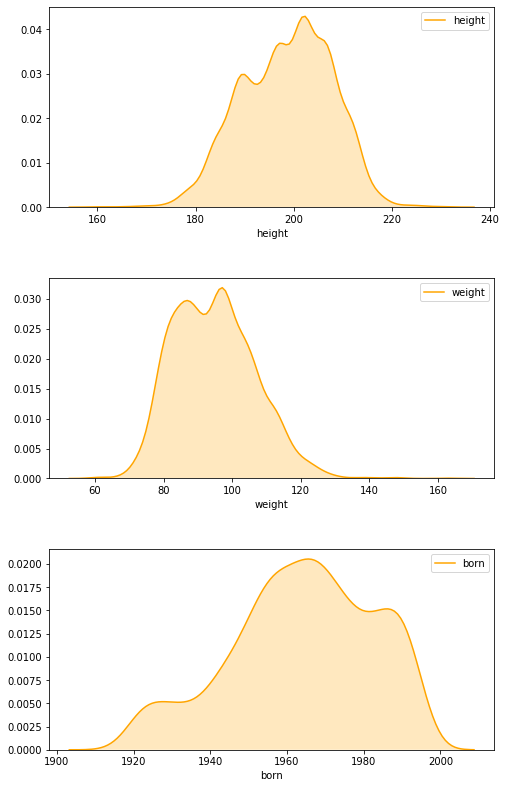

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(8,12)) # разделение графика на подграфики
fig.tight_layout(pad=5) # настройка отступа между графиками
for i in range(len(nums)):
    # построение графиков по числовым данным
    sns.kdeplot(data[nums[i]], shade=True, ax=axes[i], color='orange')
    axes[i].set_xlabel(nums[i])

По этим графикам понятно, что с годами баскетбол становился все популярнее и пик по рождаемости баскетболистов был где-то в 1970х годах.  
Большая часть баскетболистов выше 2м и весят от 80 до 100кг.

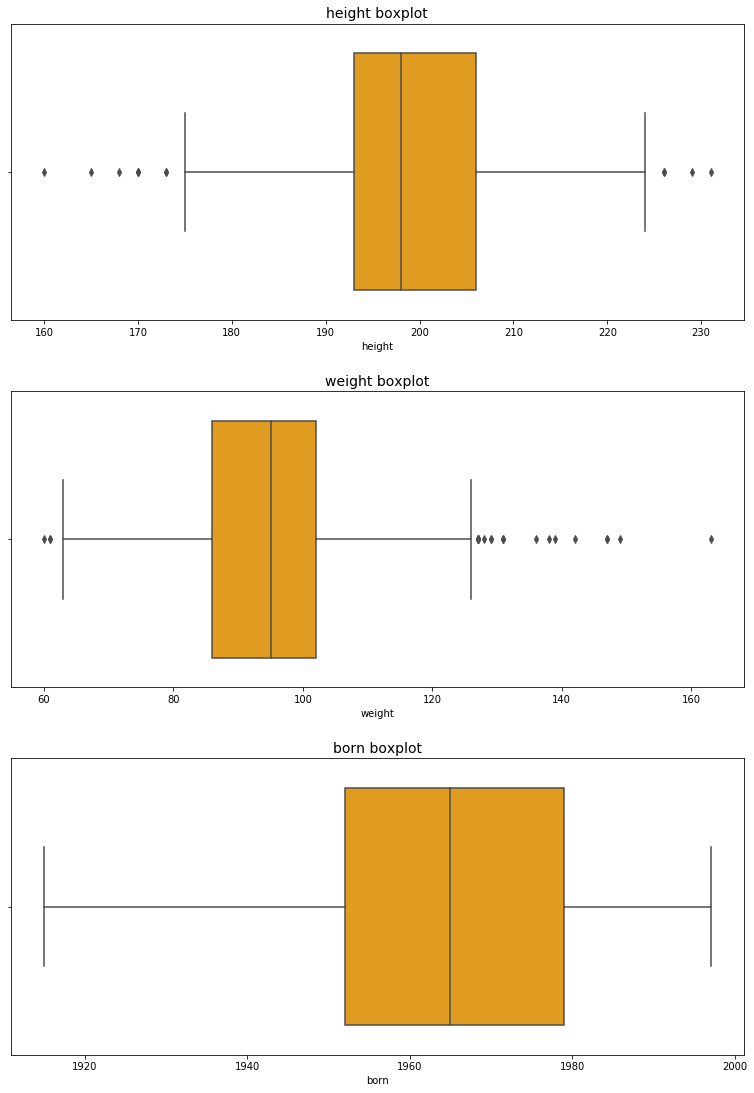

In [ ]:
# построим боксплоты
fig, axes = plt.subplots(3, 1, figsize=(12,16))
fig.tight_layout(pad=5)
for i in range(len(nums)):
    sns.boxplot(x=nums[i], data=data, ax=axes[i], color='orange')
    axes[i].set_title("{name} boxplot".format(name = nums[i]), fontsize = 14)

По этому же графику видно, что 50% баскетболистов весят от 85 до 102кг.   
Так же 50% имеют рост от 195 до 205см.

In [ ]:
def get_top_ten_plot(data, feature): # определим функцию для построения графика
    fig, ax = plt.subplots(figsize=(12,8)) # зададим размер графика
    plt.bar(data[feature].value_counts().keys()[:11], data[feature].value_counts().values[:11]) # построим барплот
    ax.set_xticklabels(data[feature].value_counts().keys(), rotation=90) # настроим названия столбцов

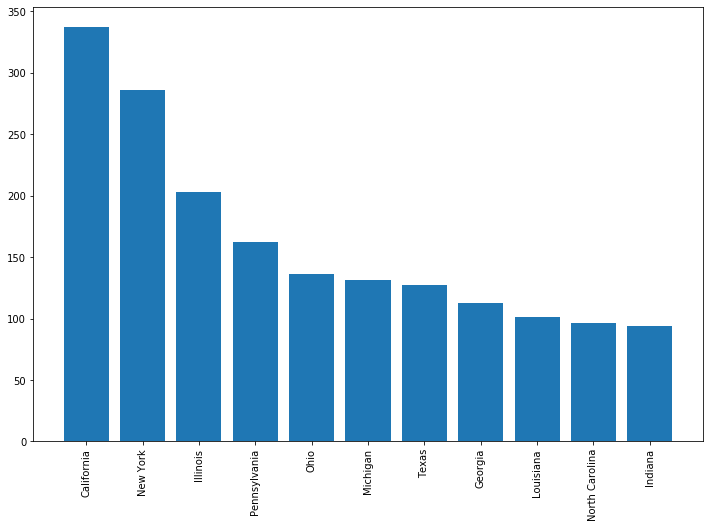

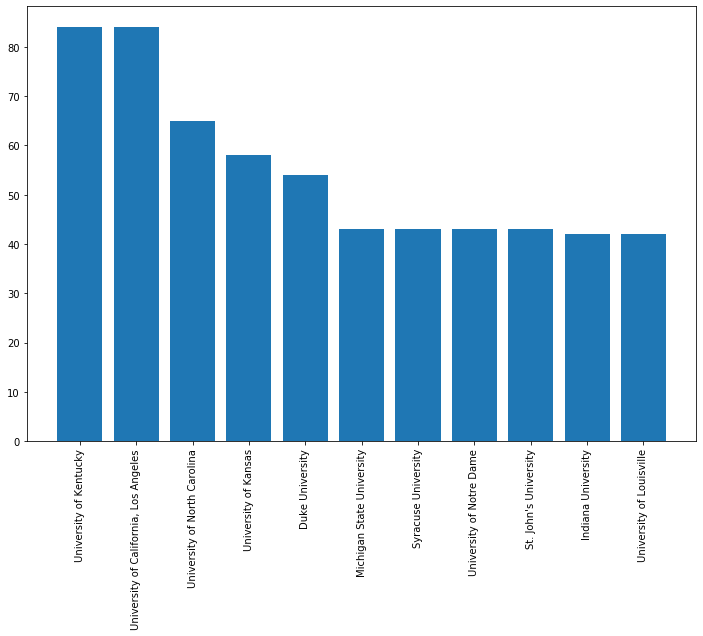

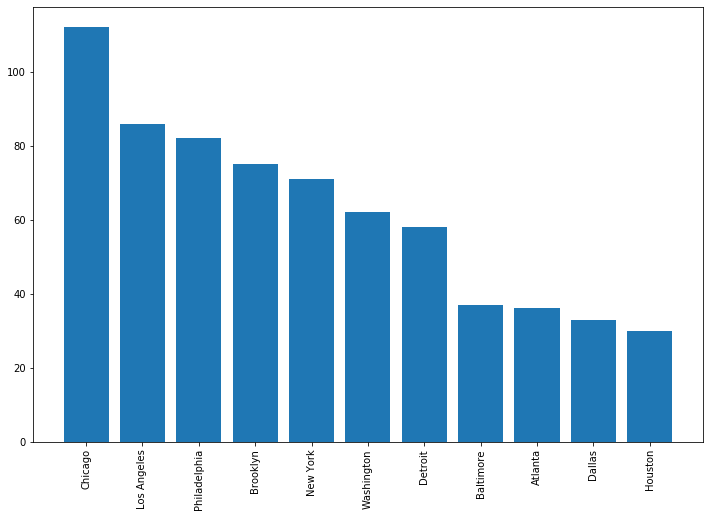

In [ ]:
for c in list(set(cat) - set(['Player'])):
    get_top_ten_plot(data, c)

Нью-Йорк является 2 по кол-ву родившихся в нем игроков и только 5 городом.  
Лучший штат, как уже было отмечено- Калифорния, а город- Чикаго.  
На равне с Калифорнийским, лидерством может похвастаться университет Кентуки.

По итогу, можно сказать, что набор данных обработан и проанализирован.  
Наиболее важная и интересная информация провизуализирована.